In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choices
import LArDS50 as LAr

In [3]:
EventRate_file = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon/Ar50plTable.csv", skiprows=0,delimiter=',')

# Extract x and y values from the loaded data
x_values = EventRate_file[:,0]  # nElectrons column
y_values = EventRate_file[:,1]  # events/electron/kg/day column

# Perform numerical integration using trapezoidal rule
total_rate = np.trapz(y_values, x_values)/365.25/1E3

print(f"Total integrated rate: {total_rate:.6e} events/kg/day")
print(f"Total integrated rate: {365.25*1000*total_rate:.6e} events/tonne/year")




Total integrated rate: 1.013692e-08 events/kg/day
Total integrated rate: 3.702511e-03 events/tonne/year


In [4]:
# Generate 1 million samples according to the distribution
n_samples = int(1E6)

# Normalize y_values to create probability weights
weights = y_values / np.sum(y_values)


# Sample from x_values using the normalized weights
# weights参数用于指定每个x_values值被选中的概率权重
# 这里weights是归一化后的y_values，代表每个能量值对应的事件率的相对大小
# 这样采样出来的能量分布就会遵循原始的事件率分布
sampled_energies = choices(x_values, weights=weights, k=n_samples)

# Plot histogram of samples
# plt.figure(figsize=(10,6))
# plt.hist(samples, bins=50, density=True, alpha=0.7, label='Sampled Distribution')
# plt.plot(x_values, y_values/np.trapz(y_values, x_values), 'r-', label='Original PDF')
# plt.xlabel('Number of Electrons')
# plt.ylabel('Probability Density')
# plt.title('Sampling Distribution vs Original PDF')
# plt.legend()
# plt.grid(True)
# plt.show()

# Print some basic statistics
# print(f"Mean of samples: {np.mean(samples):.2f}")
# print(f"Std dev of samples: {np.std(samples):.2f}")
eventWeight = total_rate/n_samples


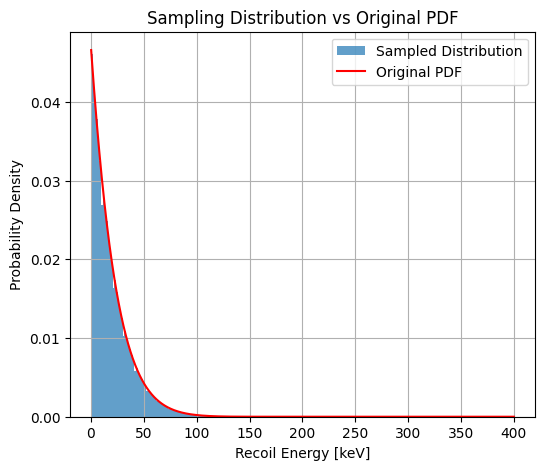

In [8]:
fig, axs = plt.subplots(figsize=(6, 5))

# Plot histogram of sampled energies
plt.hist(sampled_energies, bins=100, density=True, alpha=0.7, label='Sampled Distribution')
plt.plot(x_values, y_values/np.trapz(y_values, x_values), 'r-', label='Original PDF')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Probability Density') 
plt.title('Sampling Distribution vs Original PDF')
plt.legend()
plt.grid(True)
plt.show()



[1.0136923e-14 1.0136923e-14 1.0136923e-14 ... 1.0136923e-14 1.0136923e-14
 1.0136923e-14]
0.039993870908766875
0.0011084765098522598
1.0135336526223072e-08
3.976562821270953e-09


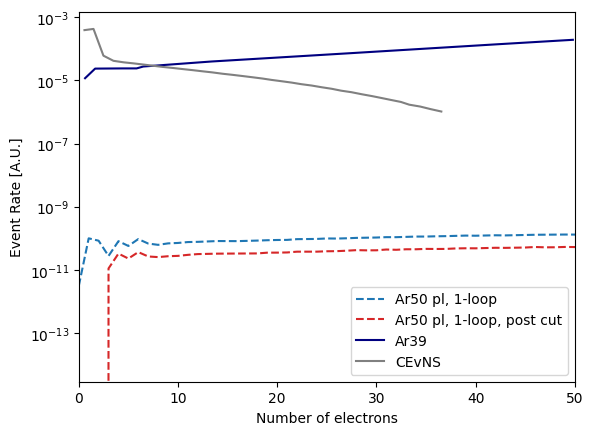

In [6]:
nElectrons_NR = []
nElectrons_NR_eff = []
for E in sampled_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

print(np.full(len(nElectrons_NR), eventWeight))
hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 170, 1), weights=np.full(len(nElectrons_NR), eventWeight))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 170, 1), weights=np.full(len(nElectrons_NR_eff), eventWeight))

Ar39_bg = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/Ar39_conservative_DSLM_afterCut.txt", skiprows=1, delimiter=',')
CEvNS_bg = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/CEvNS_EventRate_DS50_afterCut.txt", skiprows=1, delimiter=',')

print(np.trapz(Ar39_bg[:,1], Ar39_bg[:,0]))
print(np.trapz(CEvNS_bg[:,1], CEvNS_bg[:,0]))
print(np.trapz(hist, bins[:-1]))
print(np.trapz(hist_eff, bins_eff[:-1]))

fig, ax = plt.subplots()
ax.plot(bins[:-1], hist, label='Ar50 pl, 1-loop', ls='--')
ax.plot(bins_eff[:-1], hist_eff, label='Ar50 pl, 1-loop, post cut', color='tab:red', ls='--')
ax.plot(Ar39_bg[:,0], 0.1*Ar39_bg[:,1], label='Ar39', color='navy', ls='-')
ax.plot(CEvNS_bg[:,0], CEvNS_bg[:,1], label='CEvNS', color='gray', ls='-')
ax.set_xlabel('Number of electrons')
ax.set_ylabel('Event Rate [A.U.]')
ax.set_yscale('log')
ax.set_xlim(0, 50)
# ax.set_ylim(1E0, 1E5)
ax.legend()
plt.show()

